# Prac 02
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

(<matplotlib.image.AxesImage at 0x15720b110>,
 (np.float64(-0.5), np.float64(633.5), np.float64(452.5), np.float64(-0.5)))

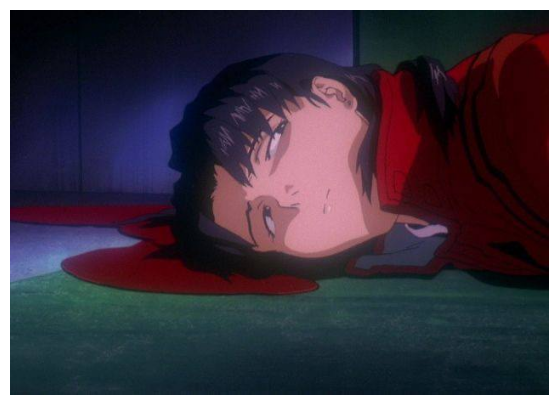

In [21]:
img = cv2.imread('../misato.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.axis('off')

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

In [5]:
img.shape

(453, 634, 3)

(<Axes: >,
 (np.float64(-0.5), np.float64(633.5), np.float64(452.5), np.float64(-0.5)))

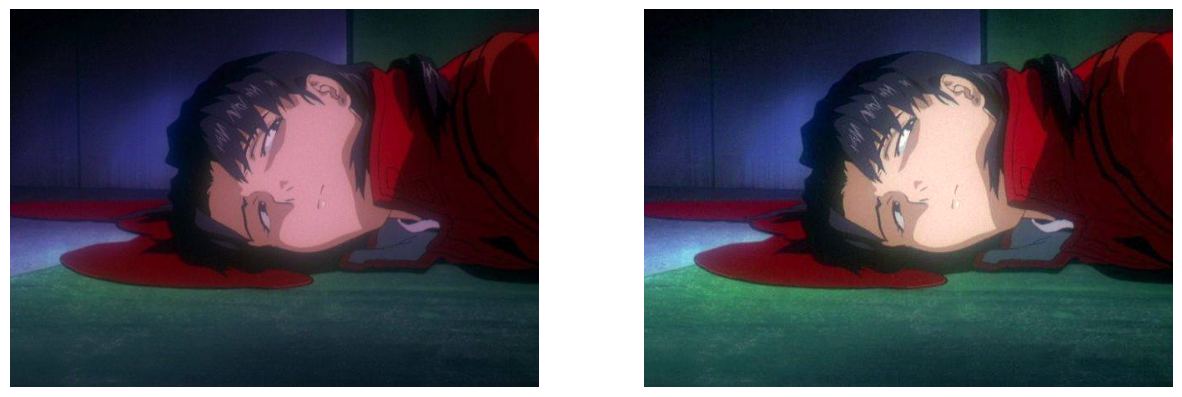

In [20]:
# Define white patch and the coefficients
row, col = 160, 310
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img), plt.axis('off')
plt.subplot(122), plt.imshow(balanced), plt.axis('off')

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >,
 (np.float64(-0.5), np.float64(633.5), np.float64(452.5), np.float64(-0.5)))

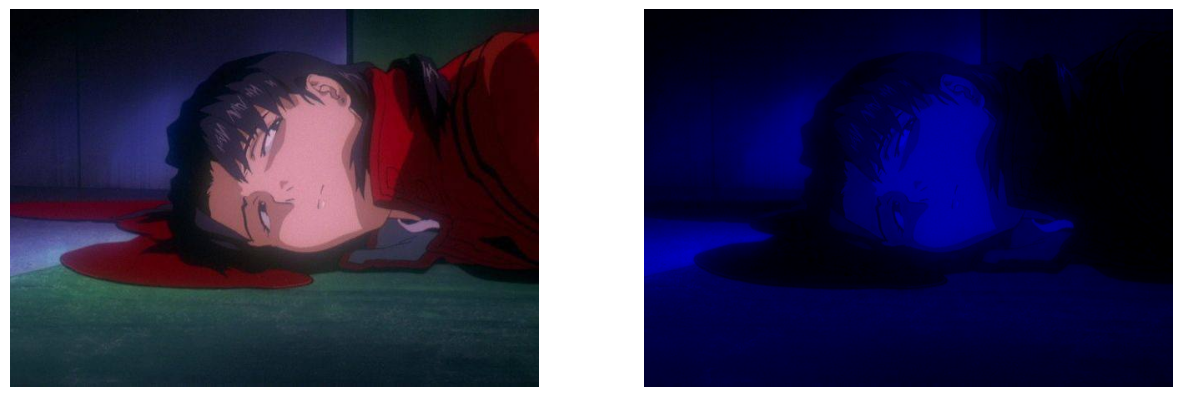

In [19]:
# Load your image
img = cv2.imread('../misato.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

# Find the brightest channel
brightest_mean = max(mean_r, mean_g, mean_b)

# Set the coefficient of the brightest color channel to 1
if brightest_mean == mean_r:
    kr = 1
    kg = (1 - kr * mean_r) / mean_g
    kb = (1 - kr * mean_r) / mean_b

elif brightest_mean == mean_g:
    kg = 1
    kr = (1 - kg * mean_g) / mean_r
    kb = (1 - kg * mean_g) / mean_b

else:  
    kb = 1
    kr = (1 - kb * mean_b) / mean_r
    kg = (1 - kb * mean_b) / mean_g

# Apply color balancing
balanced = img.copy()
balanced[:, :, 0] = np.clip(balanced[:, :, 0] * kr, 0, 255)  # Red channel
balanced[:, :, 1] = np.clip(balanced[:, :, 1] * kg, 0, 255)  # Green channel
balanced[:, :, 2] = np.clip(balanced[:, :, 2] * kb, 0, 255)  # Blue channel

# Convert the balanced image to uint8 type
balanced = balanced.astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img), plt.axis('off')
plt.subplot(122), plt.imshow(balanced), plt.axis('off')

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >,
 (np.float64(-0.5), np.float64(633.5), np.float64(452.5), np.float64(-0.5)))

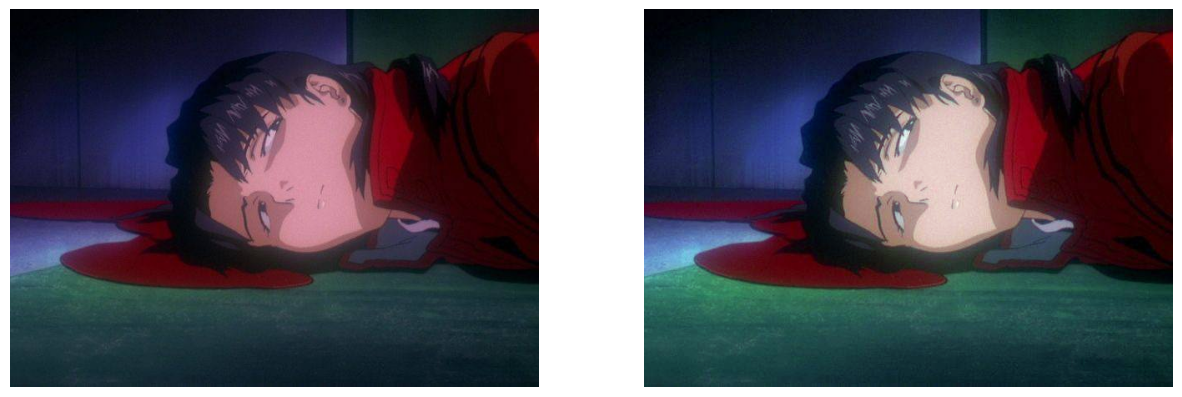

In [22]:
# Load your image
img = cv2.imread('../misato.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

# Apply scale-by-max balancing
balanced = img.copy()
balanced[:, :, 0] = np.clip((balanced[:, :, 0] / max_r) * 255, 0, 255)  # Red channel
balanced[:, :, 1] = np.clip((balanced[:, :, 1] / max_g) * 255, 0, 255)  # Green channel
balanced[:, :, 2] = np.clip((balanced[:, :, 2] / max_b) * 255, 0, 255)  # Blue channel

# Convert the balanced image to uint8 type
balanced = balanced.astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.axis('off')
plt.subplot(122), plt.imshow(balanced), plt.axis('off')